# LSA Exercise

The purpose of this exercise is to use LSA in order to run unsupervised topic extraction on texts and compare the results to the target variable. We are not going to use the target variable to train a model but only to assess if the topics found by LSA are similar to the classes that would have been used for supervised classification.

1. Let's begin and import the libraries we will be using

In [94]:
import pandas as pd 
import numpy as np
import en_core_web_sm
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

2. Load the 20 news dataset into an object news

3. Display the data description using the DESCR key

4. Store the object news.data in a DataFrame and call the column text. Extract a sample of 5000 rows to begin with. Add the target variable to this dataframe in order to run analysis later.

In [ ]:
data = pd.DataFrame(news.data, columns =["text"])
data = data.sample(5000)
data["target"] = news.target[data.index]
data.head()


In [108]:
X, y = fetch_20newsgroups(return_X_y=True)
df = pd.DataFrame(X, columns=['text'])
df["target"] = y
df = df.sample(1000)
df.head()

,text,target
1148,From: cmort@NCoast.ORG (Christopher Morton)\nS...,16
2830,From: wcsbeau@alfred.carleton.ca (OPIRG)\nSubj...,13
10145,From: tom_van_vleck@taligent.com (Tom Van Vlec...,11
2033,From: davewood@bruno.cs.colorado.edu (David Re...,5
9817,From: jmk@cbnews.cb.att.com (joseph.m.knapp)\n...,19


5. Create a column text_clean containing only alphanumerical characters and change all characters to lowercase. Also only keep the tex that is after the string "Subject:"

In [135]:
df["text_clean"] = df['text'].apply(lambda x: x.split("Subject:")[1])

In [136]:
from string import punctuation

In [140]:
for ch in punctuation:
    if ch.isalnum():
        print(ch)

In [143]:
test_text = df["text_clean"].iloc[0]

In [ ]:
new_sentence= []
for ch in test_text:
    if ch.isalnum():
        new_sentence.append(ch)

In [144]:
''.join(["lala ", "something"])

'lala something'

In [ ]:
df['list_of_words'].apply(len)

In [146]:
df['text_clean'] = df['text'].apply(lambda x: x.split("Subject:")[1])
df['text_clean'] = df['text_clean'].apply(lambda x: ''.join(ch.lower() for ch in x if ch.isalnum() or ch==" "))
df.head()

,text,target,text_clean,text_tokenized,nlp_ready
1148,From: cmort@NCoast.ORG (Christopher Morton)\nS...,16,re ban all firearms replyto cmortncoastorg ch...,"[ , ban, firearm, replyto, cmortncoastorg, chr...",ban firearm replyto cmortncoastorg christoph...
2830,From: wcsbeau@alfred.carleton.ca (OPIRG)\nSubj...,13,re is msg sensitivity superstitionorganizatio...,"[ , msg, sensitivity, superstitionorganization...",msg sensitivity superstitionorganization car...
10145,From: tom_van_vleck@taligent.com (Tom Van Vlec...,11,re looking for oneway trapdoor password encry...,"[ , look, oneway, trapdoor, password, encrypti...",look oneway trapdoor password encryption etc...
2033,From: davewood@bruno.cs.colorado.edu (David Re...,5,calling a library which creates widgets multi...,"[ , library, create, widget, multiple, timesnn...",library create widget multiple timesnntppost...
9817,From: jmk@cbnews.cb.att.com (joseph.m.knapp)\n...,19,re biblical backing of koreshs 302 tape cites...,"[ , biblical, backing, koreshs, 302, tape, cit...",biblical backing koreshs 302 tape cite enclo...


6. Create an object nlp with ```en_core_web_sm.load``` 

In [147]:
nlp = en_core_web_sm.load()

7. Tokenize the cleaned sentences and remove english stopwords

In [153]:
test_text = df["text_clean"].iloc[0]

In [ ]:
[token.lemma_ for token in nlp(x) if token.lemma_ not in STOP_WORDS]

In [ ]:
new_sentence = []

In [157]:
new_sentence = [token.lemma_ for token in nlp(test_text) if token.lemma_ not in STOP_WORDS]
" ".join(new_sentence)

'  ban firearm replyto cmortncoastorg christopher mortonorganization north coast public access nix cleveland ohline 24as quote 1993apr141844482331gnvifasufledu jrmgnvifasufledu firearm tend fall low dollarpound area economic smuggle production local people skill motivation assemble worthwhile firearm scratch highranke crime figure obtain import uzi average person average thug lucky zipgun   pay nose know modern automatic weapon   anybodywith basic manufacturing skill turn high quality submachinegun   couple high school shop teacher recently arrest build submachinegun school shopi suggest library find copy smallarm world   entire premise base nonfactual assumption like bunch overeducated new york jewish aclu lawyersfighte eliminate school prayer public school inarkansas   holly silva'

In [158]:
from spacy.lang.en.stop_words import STOP_WORDS

df["text_tokenized"] = df["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if token.lemma_ not in STOP_WORDS]))
df.head()

,text,target,text_clean,text_tokenized,nlp_ready
1148,From: cmort@NCoast.ORG (Christopher Morton)\nS...,16,re ban all firearms replyto cmortncoastorg ch...,"[ , ban, firearm, replyto, cmortncoastorg, chr...",ban firearm replyto cmortncoastorg christoph...
2830,From: wcsbeau@alfred.carleton.ca (OPIRG)\nSubj...,13,re is msg sensitivity superstitionorganizatio...,"[ , msg, sensitivity, superstitionorganization...",msg sensitivity superstitionorganization car...
10145,From: tom_van_vleck@taligent.com (Tom Van Vlec...,11,re looking for oneway trapdoor password encry...,"[ , look, oneway, trapdoor, password, encrypti...",look oneway trapdoor password encryption etc...
2033,From: davewood@bruno.cs.colorado.edu (David Re...,5,calling a library which creates widgets multi...,"[ , library, create, widget, multiple, timesnn...",library create widget multiple timesnntppost...
9817,From: jmk@cbnews.cb.att.com (joseph.m.knapp)\n...,19,re biblical backing of koreshs 302 tape cites...,"[ , biblical, backing, koreshs, 302, tape, cit...",biblical backing koreshs 302 tape cite enclo...


8. Detokenize the tokenized sentences and store them in an ```nlp_ready``` column

In [113]:
df["nlp_ready"] = df["text_tokenized"].apply(lambda x: ' '.join(x))

In [39]:
detokenized_doc = []

for sentence in data["text_tokenized"]:
    t = ' '.join(sentence)
    detokenized_doc.append(t)

data['nlp_ready'] = detokenized_doc
data.head()

,text,target,text_clean,text_tokenized,nlp_ready
5332,From: henrik@quayle.kpc.com \nSubject: Re: ARM...,17,re armenia says it could shoot down turkish p...,"[ , armenia, say, shoot, turkish, planesorgani...",armenia say shoot turkish planesorganization...
8598,"From: ab4z@Virginia.EDU (""Andi Beyer"")\nSubjec...",17,re israels expansion iiorganization universit...,"[ , israel, expansion, iiorganization, univers...",israel expansion iiorganization university v...
9040,From: cptully@med.unc.edu (Christopher P. Tull...,1,re tiff philosophical significance of 42nntpp...,"[ , tiff, philosophical, significance, 42nntpp...",tiff philosophical significance 42nntppostin...
210,From: aa888@freenet.carleton.ca (Mark Baker)\n...,15,re the arrogance of christiansreplyto aa888fr...,"[ , arrogance, christiansreplyto, aa888freenet...",arrogance christiansreplyto aa888freenetcarl...
7868,From: gsnow@clark.edu (Gary Snow)\nSubject: Re...,4,re warning dont break powerbook screenarticle...,"[ , warning, not, break, powerbook, screenarti...",warning not break powerbook screenarticleid ...


9. Use sklearn to calculate the tf-idf

In [116]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['nlp_ready'])
X

<1000x37012 sparse matrix of type '<class 'numpy.float64'>'
	with 94758 stored elements in Compressed Sparse Row format>

10. Use the truncatedSVD model in order to create a topic model with 20 different topics

In [159]:
svd_model = TruncatedSVD(n_components=20)
lsa = svd_model.fit_transform(X)

11. Assign each document to the topic it is the most linked to :

In [119]:
len(lsa[0])

20

In [163]:
test_array = lsa[0]

In [175]:
def custom_argmax(array):
    best_val = array[0]
    best_index = 0 
    for index, val  in enumerate(array):
        if val > best_val:
            best_val = val
            best_index = index
    return best_index

In [171]:
custom_argmax(test_array)

0

In [172]:
topic_df["class_pred"] = [custom_argmax(topic) for topic in lsa]
topic_df["class_pred_np"] = [np.argmax(topic) for topic in lsa]

In [173]:
topic_df[topic_df["class_pred"] == topic_df["class_pred_np"]]

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,class_pred,class_pred_np,target


In [121]:
def custom_argmax(array):
    for index_, val in enumerate(array):
        if index_ == 0:
            final_index = index_
            final_val = val
        else: 
            if val > final_val:
                final_val = val
                final_index = index_
    return final_index

In [176]:
%%timeit
custom_argmax(test)

3.39 µs ± 71.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [177]:
%%timeit
np.argmax(test)

1.55 µs ± 28.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [124]:
topic_df["class_pred"] = [custom_argmax(topic) for topic in lsa]
topic_df["class_pred_np"] = [np.argmax(topic) for topic in lsa]

In [125]:
topic_df[topic_df["class_pred_np"] != topic_df["class_pred"]]

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,class_pred,class_pred_np


12. Add the target variable to thetopic model dataframe and print the confusion matrix for the topic against the target variable :

In [182]:
topic_df['target'] = df["target"].reset_index(drop=True)

In [183]:
topic_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,...,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,class_pred,class_pred_np,target
0,0.116937,-0.004040,0.029628,0.013600,0.018187,-0.000709,0.029765,-0.002245,0.037573,0.022275,...,0.000119,-0.067702,-0.020377,0.014808,0.048871,-0.055265,-0.004180,0,0,16
1,0.137030,-0.014914,0.005578,-0.005797,0.043595,-0.000957,-0.016438,-0.001444,0.070517,-0.015223,...,0.430090,-0.125629,0.272261,0.020001,-0.056686,-0.014408,0.063644,13,13,13
2,0.154417,-0.103163,0.034981,0.220959,0.009255,0.007311,-0.006855,-0.042638,-0.054997,0.014441,...,0.015427,0.012368,0.017496,0.041703,0.028470,0.064908,-0.042462,3,3,11
3,0.095143,-0.075032,-0.028728,-0.024491,-0.050751,0.043858,-0.057782,-0.021182,0.041039,-0.010558,...,0.025727,0.021191,-0.005110,0.003792,0.070171,0.048790,0.006596,0,0,5
4,0.043857,0.011572,0.011646,-0.013621,-0.000414,-0.009553,-0.005590,0.001411,0.019308,-0.005145,...,0.014811,-0.010383,-0.039069,0.029424,0.043023,-0.045334,0.016639,0,0,19


In [188]:
topic_df["target"].value_counts()

8     64
15    61
17    60
11    57
13    56
6     54
14    54
7     54
9     52
10    50
12    50
1     49
4     48
2     47
16    45
18    44
3     43
5     42
0     40
19    30
Name: target, dtype: int64

In [187]:
topic_df["class_pred"].value_counts()

0     703
3      35
2      23
6      21
19     20
10     20
7      19
1      19
5      18
13     17
18     17
16     15
8      13
14     13
4      12
17     11
9      11
12      8
15      4
11      1
Name: class_pred, dtype: int64

Text(159.0, 0.5, 'True label')

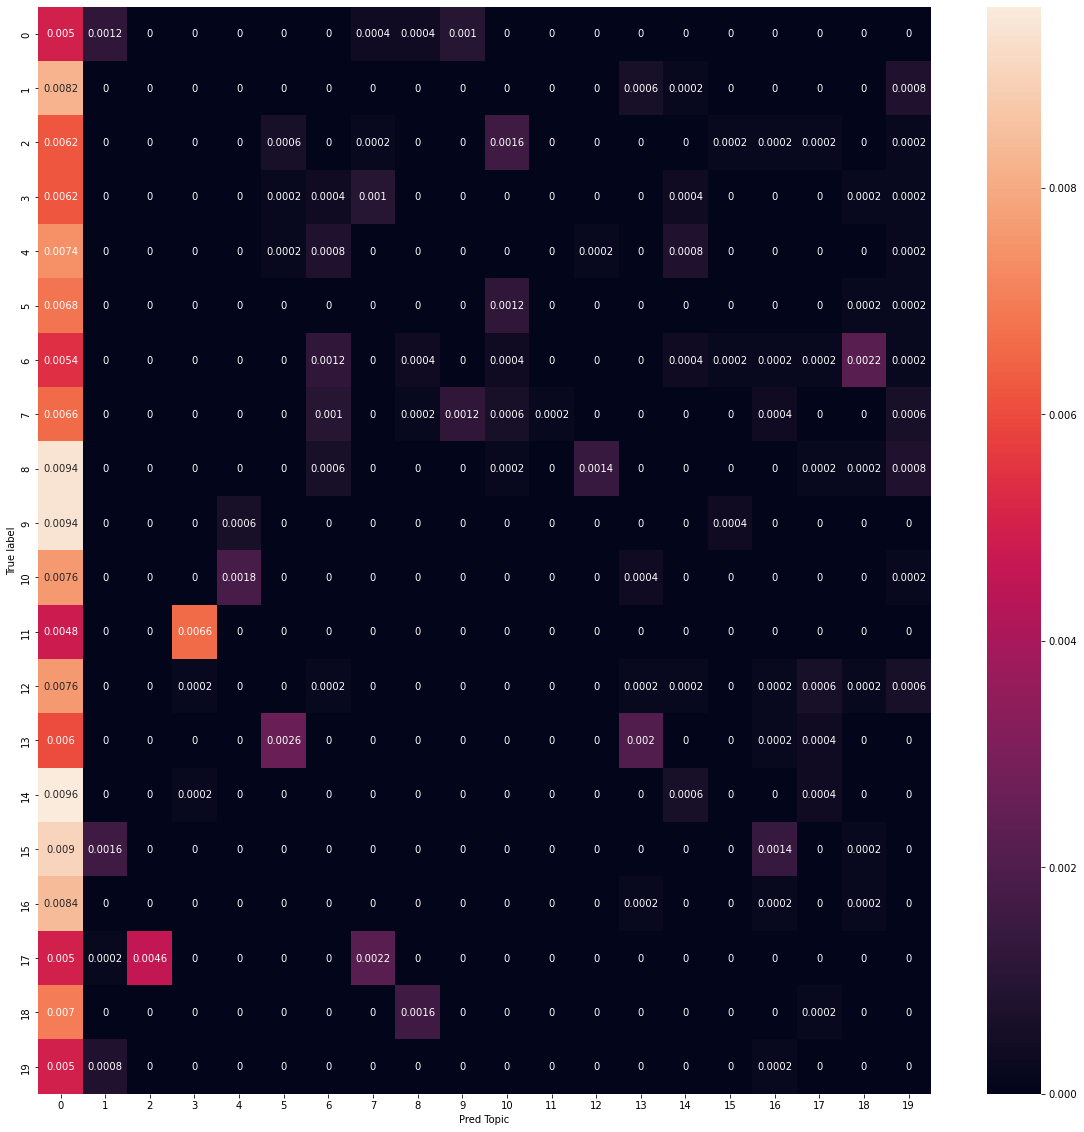

In [186]:
cm = confusion_matrix(y_true=topic_df["target"], y_pred=topic_df["class_pred"]) / 5000

fig, ax = plt.subplots(1,1, figsize = (20,20))
sns.heatmap(cm, annot=True)
ax.set_xlabel("Pred Topic")
ax.set_ylabel("True label")

In [198]:
topics = pd.DataFrame(svd_model.components_, columns=vectorizer.get_feature_names_out())

In [201]:
topics.loc[0].sort_values(ascending=False)

people         0.162566
use            0.144216
know           0.140845
think          0.139311
article        0.138592
                 ...   
730            0.000067
731            0.000067
piratesline    0.000067
mlb            0.000067
929            0.000067
Name: 0, Length: 37012, dtype: float64

In [204]:
topics.loc[1].sort_values(ascending=False).iloc[:10]

god          0.344246
people       0.160052
armenian     0.124158
christian    0.102032
believe      0.100731
atheist      0.099687
church       0.094448
jesus        0.094419
bible        0.088361
religion     0.087765
Name: 1, dtype: float64

In [206]:
topics.loc[2].sort_values(ascending=False).iloc[:10]


key           0.330264
encryption    0.262675
chip          0.259817
clipper       0.207787
algorithm     0.159541
security      0.125989
government    0.106002
device        0.099396
god           0.094080
privacy       0.093285
Name: 3, dtype: float64

In [212]:
df[df["nlp_ready"].str.find("god") != -1][["text", "nlp_ready"]].iloc[0]

text         From: sandvik@newton.apple.com (Kent Sandvik)\...
nlp_ready      inimitable rushdie anecdote islamorganizatio...
Name: 9565, dtype: object

In [213]:
df[df["nlp_ready"].str.find("god") != -1][["text", "nlp_ready"]].iloc[0].values

array(["From: sandvik@newton.apple.com (Kent Sandvik)\nSubject: Re: The Inimitable Rushdie (Re: An Anecdote about Islam\nOrganization: Cookamunga Tourist Bureau\nLines: 16\n\nIn article <115288@bu.edu>, jaeger@buphy.bu.edu (Gregg Jaeger) wrote:\n> He'd have to be precise about is rejection of God and his leaving Islam.\n> One is perfectly free to be muslim and to doubt and question the\n> existence of God, so long as one does not _reject_ God. I am sure that\n> Rushdie has be now made his atheism clear in front of a sufficient \n> number of proper witnesses. The question in regard to the legal issue\n> is his status at the time the crime was committed. \n\nGregg, so would you consider that Rushdie would now be left alone,\nand he could have a normal life? In other words, does Islam support\nthe notion of forgiving?\n\nCheers,\nKent\n---\nsandvik@newton.apple.com. ALink: KSAND -- Private activities on the net.\n",
       '  inimitable rushdie anecdote islamorganization cookamunga touris